# TALLER Regresión Regulación
Andres Useche - Rafael Torregroza

# Escenario 1


Loan Smart es una empresa de asesoramiento en materia de préstamos. Basándose en las características de sus clientes y en el monto del préstamo que necesitan, les aconsejan en qué institución financiera solicitar un préstamo. Hasta ahora sus recomendaciones se han basado en la experiencia empresarial. Ahora están tratando de aprovechar el poder de los datos que han recogido hasta ahora.

Quieren comprobar si, dadas las características de sus clientes, pueden predecir las tasas de interés que les ofrecerán las distintas entidades financieras. Quieren hacer una prueba de concepto de esta idea. Nos han proporcionado los datos de una de estas entidades financieras.  Aplicaremos la técnica de REGRESIÓN LINEAL

# Escenario 2

**Variables en la base de datos**

1.   **Amount.Requested**: es la cantidad en dólares solicitada en la solicitud de préstamo.
2.   **Amount.Funded.By.Investors**: es la cantidad en dólares prestada al solicitante.
3.   **Interest.Rate**: Tasa de interés del préstamo
4.   **Loan.Length**: es la duración en meses del préstamo. Las duraciones consideradas en este informe son dos de las más populares: 36 meses y 60 meses.
5.   **Loan.Purpose**: es la finalidad del préstamo declarada por el solicitante. Se clasifican en coche, tarjetas de crédito, consolidación de deudas, educación, reformas, vivienda, compras importantes, medicamentos, mudanzas, energías renovables, pequeñas empresas, vacaciones, bodas y otros.
6.   **Debt.To.Income.Ratio**: es el porcentaje de los ingresos brutos del consumidor que se destina al pago de deudas.
7.   **State**: es la abreviatura de los 50 estados de EE.UU. en los que reside el solicitante.
8.   **Home.Ownership**: es la situación del solicitante en la vivienda actual, que incluye propiedad, alquiler o hipoteca.
9.   **Monthly.Income**: es la cantidad mensual en dólares que gana el solicitante.
10.   **FICO.Range**: es la medida de la solvencia del solicitante.
11.   **Open.CREDIT.Lines**: es el número de líneas de crédito abiertas que tenía el solicitante en el momento de la solicitud.
12.   **Revolving.CREDIT.Balance**: es el importe total pendiente de todas las líneas de crédito.
13.   **Inquiries.in.the.Last.6.Months**: es el número de consultas autorizadas en los 6 meses en que una persona autoriza al prestamista a indagar sobre su solvencia.
14.   **Employment.Length**: es el tiempo que lleva en el trabajo actual

In [1]:
# Cargar librerías equivalentes en R
install.packages("gridExtra")

library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(tibble)
library(gridExtra)

# Configurar el tema de gráficos similar a ggplot en Python
theme_set(theme_minimal())

# Desactivar warnings
options(warn = -1)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
df <- read.csv("loan_data_train.csv")
head(df)


,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,79542,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3,5 years
2,75473,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3,4 years
3,67265,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1,< 1 year
4,80167,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1,10+ years
5,17240,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2,10+ years
6,32737,5400,5375,8.90%,36 months,small_business,6.27%,OH,RENT,3000.00,785-789,2,90,2,n/a


In [3]:
colnames(df) <- gsub("\\.", "_", colnames(df))
colnames(df)


[1] "ID"                             "Amount_Requested"              
 [3] "Amount_Funded_By_Investors"     "Interest_Rate"                 
 [5] "Loan_Length"                    "Loan_Purpose"                  
 [7] "Debt_To_Income_Ratio"           "State"                         
 [9] "Home_Ownership"                 "Monthly_Income"                
[11] "FICO_Range"                     "Open_CREDIT_Lines"             
[13] "Revolving_CREDIT_Balance"       "Inquiries_in_the_Last_6_Months"
[15] "Employment_Length"

In [4]:
str(df)

'data.frame':	2200 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount_Requested              : chr  "25000" "19750" "2100" "28000" ...
 $ Amount_Funded_By_Investors    : chr  "25000" "19750" "2100" "28000" ...
 $ Interest_Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan_Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan_Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt_To_Income_Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home_Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly_Income                : num  8607 6738 1000 7083 5833 ...
 $ FICO_Range                    : chr  "720-724" "710-714" "690-694" "710-714" ...
 $ Open_CREDIT_Lines             : c

In [5]:
colSums(is.na(df))


ID               Amount_Requested 
                             1                              1 
    Amount_Funded_By_Investors                  Interest_Rate 
                             1                              0 
                   Loan_Length                   Loan_Purpose 
                             1                              1 
          Debt_To_Income_Ratio                          State 
                             1                              1 
                Home_Ownership                 Monthly_Income 
                             1                              3 
                    FICO_Range              Open_CREDIT_Lines 
                             0                              4 
      Revolving_CREDIT_Balance Inquiries_in_the_Last_6_Months 
                             3                              3 
             Employment_Length 
                             0

In [6]:
mode_value <- names(which.max(table(df$Employment_Length)))
mode_value


[1] "10+ years"

In [7]:
mode_value <- names(which.max(table(df$Employment_Length, useNA = "no")))
df$Employment_Length[is.na(df$Employment_Length)] <- mode_value


In [8]:
colSums(is.na(df))

ID               Amount_Requested 
                             1                              1 
    Amount_Funded_By_Investors                  Interest_Rate 
                             1                              0 
                   Loan_Length                   Loan_Purpose 
                             1                              1 
          Debt_To_Income_Ratio                          State 
                             1                              1 
                Home_Ownership                 Monthly_Income 
                             1                              3 
                    FICO_Range              Open_CREDIT_Lines 
                             0                              4 
      Revolving_CREDIT_Balance Inquiries_in_the_Last_6_Months 
                             3                              3 
             Employment_Length 
                             0

In [9]:
df <- na.omit(df)


In [10]:
str(df)

'data.frame':	2186 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount_Requested              : chr  "25000" "19750" "2100" "28000" ...
 $ Amount_Funded_By_Investors    : chr  "25000" "19750" "2100" "28000" ...
 $ Interest_Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan_Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan_Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt_To_Income_Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home_Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly_Income                : num  8607 6738 1000 7083 5833 ...
 $ FICO_Range                    : chr  "720-724" "710-714" "690-694" "710-714" ...
 $ Open_CREDIT_Lines             : c

In [11]:
colSums(is.na(df))

ID               Amount_Requested 
                             0                              0 
    Amount_Funded_By_Investors                  Interest_Rate 
                             0                              0 
                   Loan_Length                   Loan_Purpose 
                             0                              0 
          Debt_To_Income_Ratio                          State 
                             0                              0 
                Home_Ownership                 Monthly_Income 
                             0                              0 
                    FICO_Range              Open_CREDIT_Lines 
                             0                              0 
      Revolving_CREDIT_Balance Inquiries_in_the_Last_6_Months 
                             0                              0 
             Employment_Length 
                             0

# Modificación de tipos de datos

In [12]:
cols_to_convert <- c("Amount_Requested", "Amount_Funded_By_Investors",
                     "Open_CREDIT_Lines", "Revolving_CREDIT_Balance",
                     "Inquiries_in_the_Last_6_Months")

df[cols_to_convert] <- lapply(df[cols_to_convert], as.numeric)


In [13]:
head(df)

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,79542,25000,25000.00,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3,5 years
2,75473,19750,19750.00,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3,4 years
3,67265,2100,2100.00,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1,< 1 year
4,80167,28000,28000.00,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1,10+ years
5,17240,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2,10+ years
6,32737,5400,5375.00,8.90%,36 months,small_business,6.27%,OH,RENT,3000.00,785-789,2,90,2,n/a


In [14]:
df$Interest_Rate <- as.numeric(gsub("%", "", df$Interest_Rate))


In [15]:
df$Loan_Length <- sapply(strsplit(df$Loan_Length, " "), `[`, 1)


In [16]:
df$Loan_Length <- as.numeric(df$Loan_Length)


In [17]:
df$Debt_To_Income_Ratio <- as.numeric(gsub("%", "", df$Debt_To_Income_Ratio))


In [18]:
head(df)

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,79542,25000,25000.00,18.49,60,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3,5 years
2,75473,19750,19750.00,17.27,60,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3,4 years
3,67265,2100,2100.00,14.33,36,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1,< 1 year
4,80167,28000,28000.00,16.29,36,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1,10+ years
5,17240,24250,17431.82,12.23,60,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2,10+ years
6,32737,5400,5375.00,8.90,36,small_business,6.27,OH,RENT,3000.00,785-789,2,90,2,n/a


In [19]:
df$Employment_Length <- as.numeric(gsub("<|years|year|\\+", "", df$Employment_Length))


In [20]:
library(tidyr)  # Para separar columnas

# Separar la columna en dos nuevas columnas
df <- separate(df, FICO_Range, into = c("Min_Fic", "Max_Fic"), sep = "-", convert = TRUE)

# Calcular la media de las dos columnas
df$Fico_Mean <- (df$Min_Fic + df$Max_Fic) / 2

# Ver el dataframe y los tipos de datos
str(df)


'data.frame':	2186 obs. of  17 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount_Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount_Funded_By_Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest_Rate                 : num  18.5 17.3 14.3 16.3 12.2 ...
 $ Loan_Length                   : num  60 60 36 36 60 36 60 36 60 36 ...
 $ Loan_Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt_To_Income_Ratio          : num  27.6 13.4 3.5 19.6 23.8 ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home_Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly_Income                : num  8607 6738 1000 7083 5833 ...
 $ Min_Fic                       : int  720 710 690 710 730 785 665 735 740 765 ...
 $ Max_Fic                       : int  724 714 694 714 734 789 669 739 744 769 

In [21]:
df <- df[, !names(df) %in% c("ID", "FICO_Range", "Min_Fic", "Max_Fic")]


In [22]:
unique(df$Home_Ownership)


[1] "MORTGAGE" "OWN"      "RENT"     "OTHER"

In [23]:
unique(df$State)


[1] "VA" "NY" "LA" "NV" "OH" "CA" "IL" "NC" "NJ" "WA" "CT" "AK" "CO" "MA" "TX"
[16] "VT" "OK" "FL" "NH" "GA" "MN" "MD" "WY" "PA" "AL" "AZ" "SC" "MI" "OR" "RI"
[31] "NM" "MO" "WI" "KY" "UT" "AR" "WV" "DE" "MT" "KS" "DC" "SD" "HI" "IN" "MS"
[46] "."

In [24]:
unique(df$Loan_Purpose)


[1] "debt_consolidation" "major_purchase"     "credit_card"       
 [4] "small_business"     "home_improvement"   "other"             
 [7] "car"                "moving"             "house"             
[10] "educational"        "vacation"           "wedding"           
[13] "medical"            "renewable_energy"

In [25]:
library(dplyr)

# Separar variables numéricas y categóricas
Numeric_data <- names(df)[sapply(df, is.numeric)]
Cat_data <- names(df)[sapply(df, is.character) | sapply(df, is.factor)]

# Crear nuevos dataframes
Num_Vars <- df %>% select(all_of(Numeric_data))
Cat_Vars <- df %>% select(all_of(Cat_data))
Y_Var <- df %>% select(Interest_Rate)

# Mostrar resultados
print("Num_Vars")
print(head(Num_Vars, 3))
print(dim(Num_Vars))

print("Cat_Vars")
print(head(Cat_Vars, 3))
print(dim(Cat_Vars))

print("Y_Var")
print(head(Y_Var, 3))
print(dim(Y_Var))


[1] "Num_Vars"
  Amount_Requested Amount_Funded_By_Investors Interest_Rate Loan_Length
1            25000                      25000         18.49          60
2            19750                      19750         17.27          60
3             2100                       2100         14.33          36
  Debt_To_Income_Ratio Monthly_Income Open_CREDIT_Lines
1                27.56        8606.56                11
2                13.39        6737.50                14
3                 3.50        1000.00                13
  Revolving_CREDIT_Balance Inquiries_in_the_Last_6_Months Employment_Length
1                    15210                              3                 5
2                    19070                              3                 4
3                      893                              1                 1
  Fico_Mean
1       722
2       712
3       692
[1] 2186   11
[1] "Cat_Vars"
        Loan_Purpose State Home_Ownership
1 debt_consolidation    VA       MORTGAGE
2 debt_c

In [26]:
Cat_Vars <- Cat_Vars[, !names(Cat_Vars) %in% "State"]


In [27]:
Num_Vars <- Num_Vars[, !names(Num_Vars) %in% "Interest_Rate"]


In [28]:
colSums(is.na(Num_Vars))

Amount_Requested     Amount_Funded_By_Investors 
                             4                              3 
                   Loan_Length           Debt_To_Income_Ratio 
                             1                              0 
                Monthly_Income              Open_CREDIT_Lines 
                             0                              3 
      Revolving_CREDIT_Balance Inquiries_in_the_Last_6_Months 
                             2                              0 
             Employment_Length                      Fico_Mean 
                            70                              0

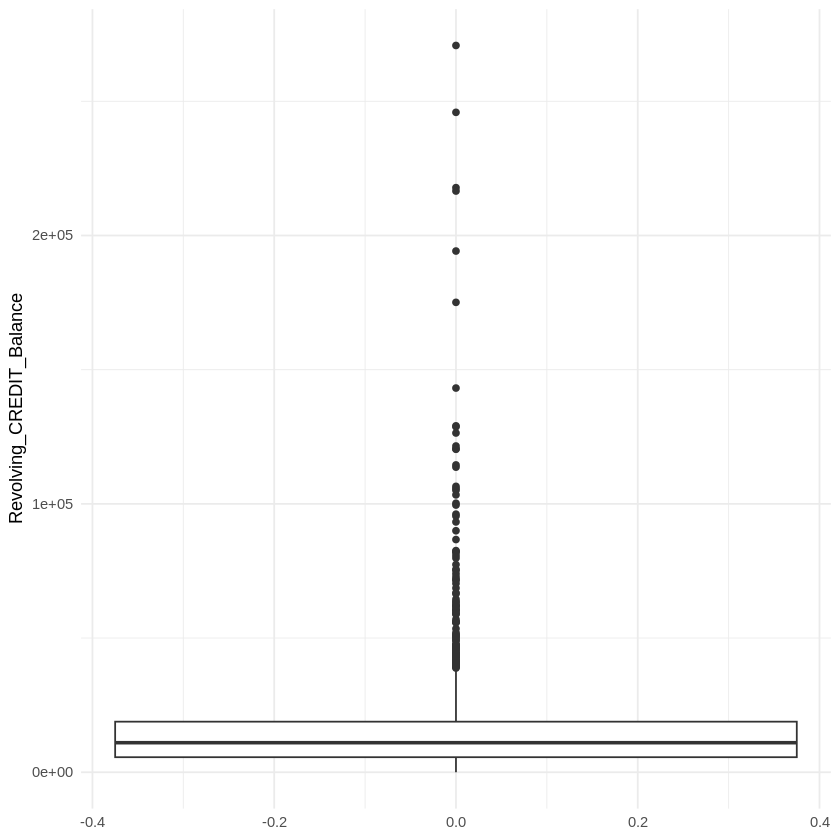

In [29]:
library(ggplot2)

ggplot(Num_Vars, aes(y = Revolving_CREDIT_Balance)) +
  geom_boxplot() +
  theme_minimal()


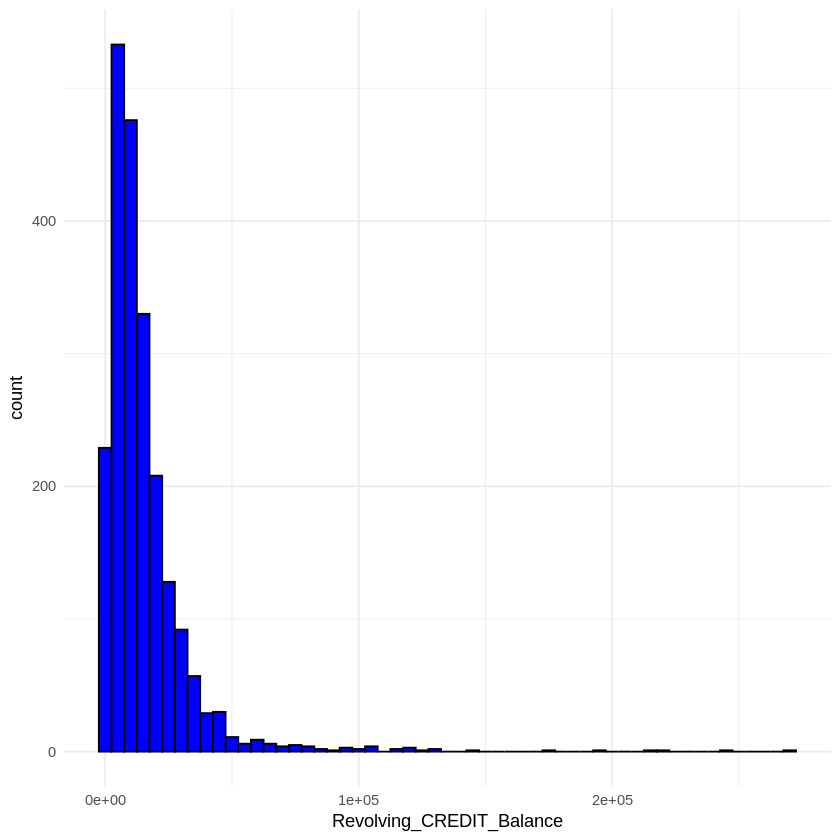

In [30]:
library(ggplot2)

ggplot(Num_Vars, aes(x = Revolving_CREDIT_Balance)) +
  geom_histogram(binwidth = 5000, fill = "blue", color = "black") +
  theme_minimal()


In [31]:
outlier_missing_treatment <- function(x) {
  x <- pmax(pmin(x, quantile(x, 0.95, na.rm = TRUE)), quantile(x, 0.05, na.rm = TRUE))
  x[is.na(x)] <- median(x, na.rm = TRUE)
  return(x)
}


In [32]:
Num_Vars[] <- lapply(Num_Vars, outlier_missing_treatment)


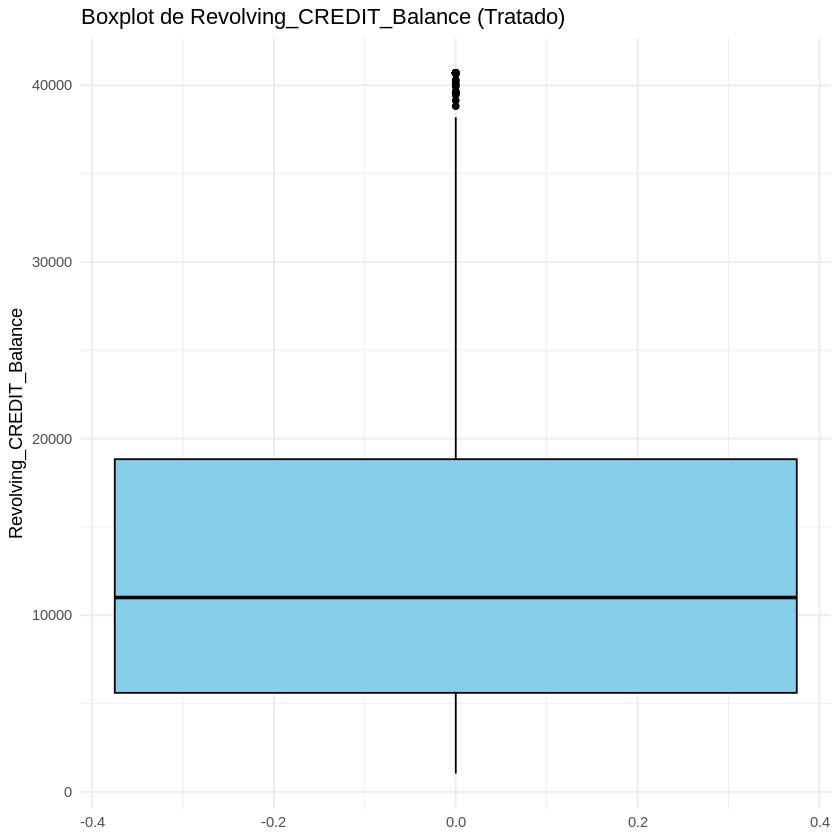

In [33]:
library(ggplot2)

ggplot(Num_Vars, aes(y = Revolving_CREDIT_Balance)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  theme_minimal() +
  ggtitle("Boxplot de Revolving_CREDIT_Balance (Tratado)")


In [34]:
Mode_treatment <- function(x) {
  mode_value <- names(sort(table(x), decreasing = TRUE))[1]  # Obtener la moda
  x[is.na(x)] <- mode_value  # Reemplazar valores NA con la moda
  return(x)
}


In [35]:
Cat_Vars[] <- lapply(Cat_Vars, Mode_treatment)


# Creación de variables "dummmy" para variables categóricas

In [36]:
dummy_vars <- model.matrix(~ . - 1, data = Cat_Vars)  # -1 elimina la columna de intercepto
dummy_vars <- as.data.frame(dummy_vars)  # Convertir a data frame


In [37]:
head(dummy_vars)

,Loan_Purposecar,Loan_Purposecredit_card,Loan_Purposedebt_consolidation,Loan_Purposeeducational,Loan_Purposehome_improvement,Loan_Purposehouse,Loan_Purposemajor_purchase,Loan_Purposemedical,Loan_Purposemoving,Loan_Purposeother,Loan_Purposerenewable_energy,Loan_Purposesmall_business,Loan_Purposevacation,Loan_Purposewedding,Home_OwnershipOTHER,Home_OwnershipOWN,Home_OwnershipRENT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [38]:
df_final <- cbind(Num_Vars, dummy_vars, Y_Var)
str(df_final)


'data.frame':	2186 obs. of  28 variables:
 $ Amount_Requested              : num  25000 19750 2800 28000 24250 ...
 $ Amount_Funded_By_Investors    : num  25000 19750 2203 27950 17432 ...
 $ Loan_Length                   : num  60 60 36 36 60 36 60 36 60 36 ...
 $ Debt_To_Income_Ratio          : num  27.6 13.4 3.5 19.6 23.8 ...
 $ Monthly_Income                : num  8607 6738 2167 7083 5833 ...
 $ Open_CREDIT_Lines             : num  11 14 13 12 6 4 5 11 18 7 ...
 $ Revolving_CREDIT_Balance      : num  15210 19070 1041 38194 31061 ...
 $ Inquiries_in_the_Last_6_Months: num  3 3 1 1 2 2 0 1 0 1 ...
 $ Employment_Length             : num  5 4 1 10 10 5 2 1 5 5 ...
 $ Fico_Mean                     : num  722 712 692 712 732 777 667 737 742 767 ...
 $ Loan_Purposecar               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Loan_Purposecredit_card       : num  0 0 0 1 1 0 1 0 0 0 ...
 $ Loan_Purposedebt_consolidation: num  1 1 0 0 0 0 0 0 0 0 ...
 $ Loan_Purposeeducational       : num  0 0 0 0 0 0 

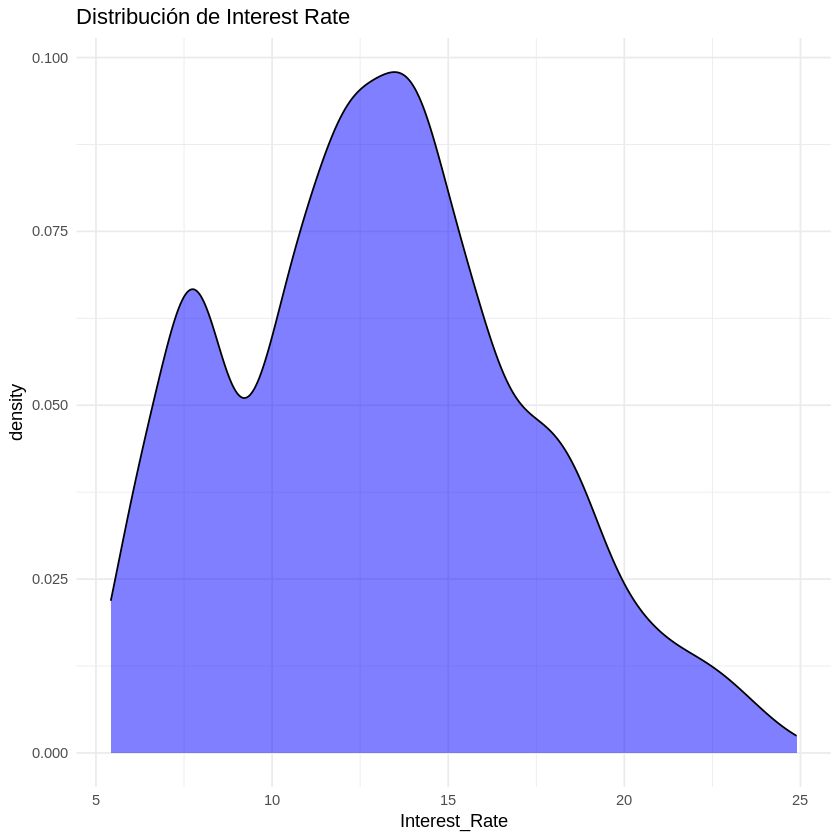

In [39]:
library(ggplot2)

ggplot(df_final, aes(x = Interest_Rate)) +
  geom_density(fill = "blue", alpha = 0.5) +  # Gráfica de densidad con color
  theme_minimal() +
  ggtitle("Distribución de Interest Rate")


#Selección de las variables más importantes

In [40]:
install.packages("caret", dependencies = TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘rbibutils’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’

In [41]:
library(caret)

set.seed(123)  # Para reproducibilidad
train_index <- createDataPartition(df_final$Interest_Rate, p = 0.7, list = FALSE)

train <- df_final[train_index, ]
test <- df_final[-train_index, ]


Loading required package: lattice



In [42]:
# Separar la variable dependiente (Interest_Rate) de las independientes
y_train <- train$Interest_Rate
X_train <- train[, setdiff(names(train), "Interest_Rate")]

y_test <- test$Interest_Rate
X_test <- test[, setdiff(names(test), "Interest_Rate")]

# Agregar una columna de constantes (intercepto) como hace sm.add_constant()
X_train <- cbind(Intercept = 1, X_train)
X_test <- cbind(Intercept = 1, X_test)


In [43]:
library(MASS)

# Ajustar el modelo inicial con todas las variables
full_model <- lm(Interest_Rate ~ ., data = train)

# Aplicar selección de variables (hacia adelante y atrás)
best_model <- stepAIC(full_model, direction = "both", trace = TRUE)




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=2038.54
Interest_Rate ~ Amount_Requested + Amount_Funded_By_Investors + 
    Loan_Length + Debt_To_Income_Ratio + Monthly_Income + Open_CREDIT_Lines + 
    Revolving_CREDIT_Balance + Inquiries_in_the_Last_6_Months + 
    Employment_Length + Fico_Mean + Loan_Purposecar + Loan_Purposecredit_card + 
    Loan_Purposedebt_consolidation + Loan_Purposeeducational + 
    Loan_Purposehome_improvement + Loan_Purposehouse + Loan_Purposemajor_purchase + 
    Loan_Purposemedical + Loan_Purposemoving + Loan_Purposeother + 
    Loan_Purposerenewable_energy + Loan_Purposesmall_business + 
    Loan_Purposevacation + Loan_Purposewedding + Home_OwnershipOTHER + 
    Home_OwnershipOWN + Home_OwnershipRENT


Step:  AIC=2038.54
Interest_Rate ~ Amount_Requested + Amount_Funded_By_Investors + 
    Loan_Length + Debt_To_Income_Ratio + Monthly_Income + Open_CREDIT_Lines + 
    Revolving_CREDIT_Balance + Inquiries_in_the_Last_6_Months + 
    Employment_Length + Fico_Mean + Loan_Purposecar + Loan_Purp

In [44]:
# Mostrar resumen del modelo final
summary(best_model)



Call:
lm(formula = Interest_Rate ~ Amount_Requested + Amount_Funded_By_Investors + 
    Loan_Length + Monthly_Income + Open_CREDIT_Lines + Revolving_CREDIT_Balance + 
    Inquiries_in_the_Last_6_Months + Fico_Mean + Loan_Purposeeducational + 
    Loan_Purposemajor_purchase + Loan_Purposemoving + Loan_Purposeother + 
    Home_OwnershipOTHER + Home_OwnershipOWN + Home_OwnershipRENT, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6610 -1.2328 -0.1626  1.1472  8.8434 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.303e+01  1.172e+00  62.312  < 2e-16 ***
Amount_Requested                8.119e-05  2.619e-05   3.101 0.001966 ** 
Amount_Funded_By_Investors      1.062e-04  2.560e-05   4.147 3.56e-05 ***
Loan_Length                     1.327e-01  5.533e-03  23.990  < 2e-16 ***
Monthly_Income                 -3.523e-05  2.276e-05  -1.548 0.121828    
Open_CREDIT_Lines              -4.755e-02  

# Reducción de variables en base al p-valor

In [45]:
 finalmodel <- lm(Interest_Rate ~ Amount_Requested + Amount_Funded_By_Investors +
    Loan_Length + Monthly_Income + Open_CREDIT_Lines + Revolving_CREDIT_Balance +
    Inquiries_in_the_Last_6_Months + Fico_Mean + Loan_Purposeeducational +
    Loan_Purposemajor_purchase + Loan_Purposemoving + Loan_Purposeother +
    Home_OwnershipOTHER + Home_OwnershipOWN + Home_OwnershipRENT,
    data = train)

# Mostrar el resumen detallado del modelo
summary(finalmodel)



Call:
lm(formula = Interest_Rate ~ Amount_Requested + Amount_Funded_By_Investors + 
    Loan_Length + Monthly_Income + Open_CREDIT_Lines + Revolving_CREDIT_Balance + 
    Inquiries_in_the_Last_6_Months + Fico_Mean + Loan_Purposeeducational + 
    Loan_Purposemajor_purchase + Loan_Purposemoving + Loan_Purposeother + 
    Home_OwnershipOTHER + Home_OwnershipOWN + Home_OwnershipRENT, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6610 -1.2328 -0.1626  1.1472  8.8434 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.303e+01  1.172e+00  62.312  < 2e-16 ***
Amount_Requested                8.119e-05  2.619e-05   3.101 0.001966 ** 
Amount_Funded_By_Investors      1.062e-04  2.560e-05   4.147 3.56e-05 ***
Loan_Length                     1.327e-01  5.533e-03  23.990  < 2e-16 ***
Monthly_Income                 -3.523e-05  2.276e-05  -1.548 0.121828    
Open_CREDIT_Lines              -4.755e-02  

# Post model

In [46]:
# Instalar paquetes si no los tienes
install.packages("Metrics")
install.packages("stats")

# Cargar las bibliotecas
library(Metrics)
library(stats)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




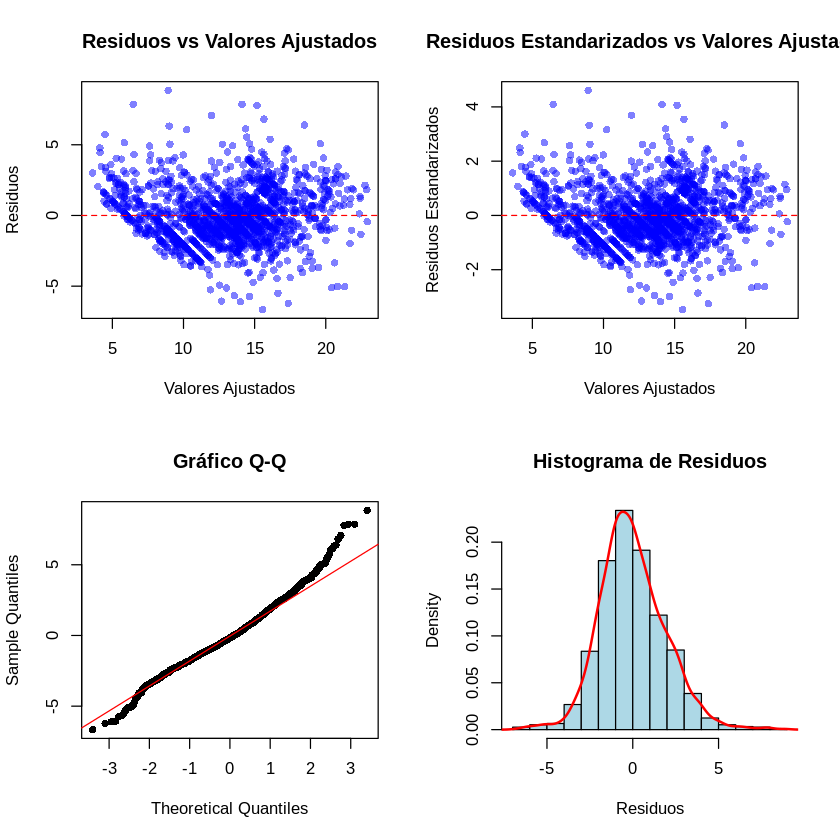

In [48]:
# Calcular valores ajustados y residuos
y_pred <- fitted(finalmodel)
residuals <- resid(finalmodel)

# Configurar ventana gráfica
par(mfrow=c(2,2))

# Gráfico 1: Residuos vs Valores Ajustados
plot(y_pred, residuals, main="Residuos vs Valores Ajustados",
     xlab="Valores Ajustados", ylab="Residuos", pch=16, col=alpha("blue", 0.5))
abline(h=0, col="red", lty=2)

# Gráfico 2: Residuos Estandarizados vs Valores Ajustados
std_residuals <- rstandard(finalmodel)
plot(y_pred, std_residuals, main="Residuos Estandarizados vs Valores Ajustados",
     xlab="Valores Ajustados", ylab="Residuos Estandarizados", pch=16, col=alpha("blue", 0.5))
abline(h=0, col="red", lty=2)

# Gráfico 3: Gráfico Q-Q
qqnorm(residuals, main="Gráfico Q-Q", pch=16)
qqline(residuals, col="red")

# Gráfico 4: Histograma de Residuos
hist(residuals, probability=TRUE, col="lightblue", main="Histograma de Residuos", xlab="Residuos")
lines(density(residuals), col="red", lwd=2)

# Restablecer ventana gráfica
par(mfrow=c(1,1))


Puesto que el p-value es mayor que 0.05, aceptamos la hipótesis nula de que los residuos tienen la varianza constante, luego el modelo de regresión múltiple es apropiado

In [50]:
# Instalar paquete si no está disponible
if (!require(lmtest)) install.packages("lmtest", dependencies=TRUE)

# Cargar la librería
library(lmtest)

# Prueba de Durbin-Watson
dw_test <- dwtest(finalmodel)

# Mostrar resultados
print(dw_test)



	Durbin-Watson test

data:  finalmodel
DW = 1.9957, p-value = 0.467
alternative hypothesis: true autocorrelation is greater than 0



Puesto que el indice de Durbin-Watson está entre 1.5 y 2.5, podemos considerar que la autocorrelación de residuos no es problemática en este modelo de regresión

In [51]:
# Agregar valores ajustados al conjunto de entrenamiento
train$pred <- finalmodel$fitted.values

# Mostrar las primeras 3 filas
head(train, 3)


,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,⋯,Loan_Purposeother,Loan_Purposerenewable_energy,Loan_Purposesmall_business,Loan_Purposevacation,Loan_Purposewedding,Home_OwnershipOTHER,Home_OwnershipOWN,Home_OwnershipRENT,Interest_Rate,pred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2800,2202.50,36,3.50,2166.67,13,1040.95,1,1,692,⋯,0,0,0,0,0,0,1,0,14.33,12.82991
7,16000,16000.00,60,11.27,4791.67,5,8474.00,0,2,667,⋯,0,0,0,0,0,0,0,1,22.47,20.01330
9,24000,23772.15,60,15.54,8333.33,18,40695.55,0,5,742,⋯,0,0,0,0,0,0,0,0,12.99,13.04999


In [53]:
# Hacer predicciones sobre el conjunto de prueba
test$pred <- predict(finalmodel, newdata = X_test)

# Mostrar las primeras 6 filas
head(test, 6)


,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_Mean,⋯,Loan_Purposeother,Loan_Purposerenewable_energy,Loan_Purposesmall_business,Loan_Purposevacation,Loan_Purposewedding,Home_OwnershipOTHER,Home_OwnershipOWN,Home_OwnershipRENT,Interest_Rate,pred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25000,25000.00,60,27.56,8606.56,11,15210.00,3,5,722,⋯,0,0,0,0,0,0,0,0,18.49,17.263080
2,19750,19750.00,60,13.39,6737.50,14,19070.00,3,4,712,⋯,0,0,0,0,0,0,0,0,17.27,17.114441
4,28000,27950.00,36,19.62,7083.33,12,38194.00,1,10,712,⋯,0,0,0,0,0,0,0,0,16.29,14.349088
5,24250,17431.82,60,23.79,5833.33,6,31061.00,2,10,732,⋯,0,0,0,0,0,0,0,0,12.23,15.108750
6,5400,5375.00,36,6.27,3000.00,4,1040.95,2,5,777,⋯,0,0,1,0,0,0,0,1,8.90,5.525857
8,6400,6400.00,36,9.58,6400.00,11,12306.00,1,1,737,⋯,0,0,0,0,0,0,0,1,7.51,8.991435


In [54]:
# Cargar librerías necesarias
library(Metrics)

# Error absoluto medio porcentual (MAPE)
MAPE_train <- round(mean(abs((train$Interest_Rate - train$pred) / train$Interest_Rate)) * 100, 2)
cat("MAPE_train:", MAPE_train, "\n")

# Mean Squared Error (MSE)
MSE_train <- mean((train$Interest_Rate - train$pred)^2)
cat("MSE_train:", MSE_train, "\n")

# Coeficiente de correlación de Pearson
Corr_train <- cor(train$Interest_Rate, train$pred)
cat("Corr_train:", Corr_train, "\n")


MAPE_train: 12.55 
MSE_train: 3.675273 
Corr_train: 0.8903949 


In [55]:
# Cargar librerías necesarias
library(Metrics)

# Error absoluto medio porcentual (MAPE)
MAPE_test <- round(mean(abs((test$Interest_Rate - test$pred) / test$Interest_Rate)) * 100, 2)
cat("MAPE_test:", MAPE_test, "\n")

# Mean Squared Error (MSE)
MSE_test <- mean((test$Interest_Rate - test$pred)^2)
cat("MSE_test:", MSE_test, "\n")

# Coeficiente de correlación de Pearson
Corr_test <- cor(test$Interest_Rate, test$pred)
cat("Corr_test:", Corr_test, "\n")


MAPE_test: 12.82 
MSE_test: 3.749229 
Corr_test: 0.8806242 


# Decile Analisys

In [56]:
# Crear deciles basados en la predicción del modelo
train$Deciles <- cut(train$pred,
                     breaks = quantile(train$pred, probs = seq(0, 1, by = 0.1), na.rm = TRUE),
                     labels = FALSE,
                     include.lowest = TRUE)

# Ver los primeros valores
head(train$Deciles)


[1]  5 10  5  1  3  2

In [57]:
# Calcular el promedio del interés real por decil
avg_actual <- aggregate(Interest_Rate ~ Deciles, data = train, FUN = mean)

# Calcular el promedio de la predicción por decil
avg_pred <- aggregate(pred ~ Deciles, data = train, FUN = mean)

# Ordenar los deciles en orden descendente
avg_actual <- avg_actual[order(-avg_actual$Deciles), ]
avg_pred <- avg_pred[order(-avg_pred$Deciles), ]

# Combinar ambos resultados en un solo data frame
Decile_analysis_train <- merge(avg_actual, avg_pred, by = "Deciles")

# Ver los resultados
print(Decile_analysis_train)


   Deciles Interest_Rate      pred
1        1      7.272078  6.148314
2        2      8.626863  8.906078
3        3      9.868954 10.556237
4        4     11.420523 11.921866
5        5     12.715425 13.044994
6        6     13.258105 13.878491
7        7     14.856993 14.699645
8        8     15.973529 15.544442
9        9     16.776144 16.662123
10      10     20.090654 19.504422


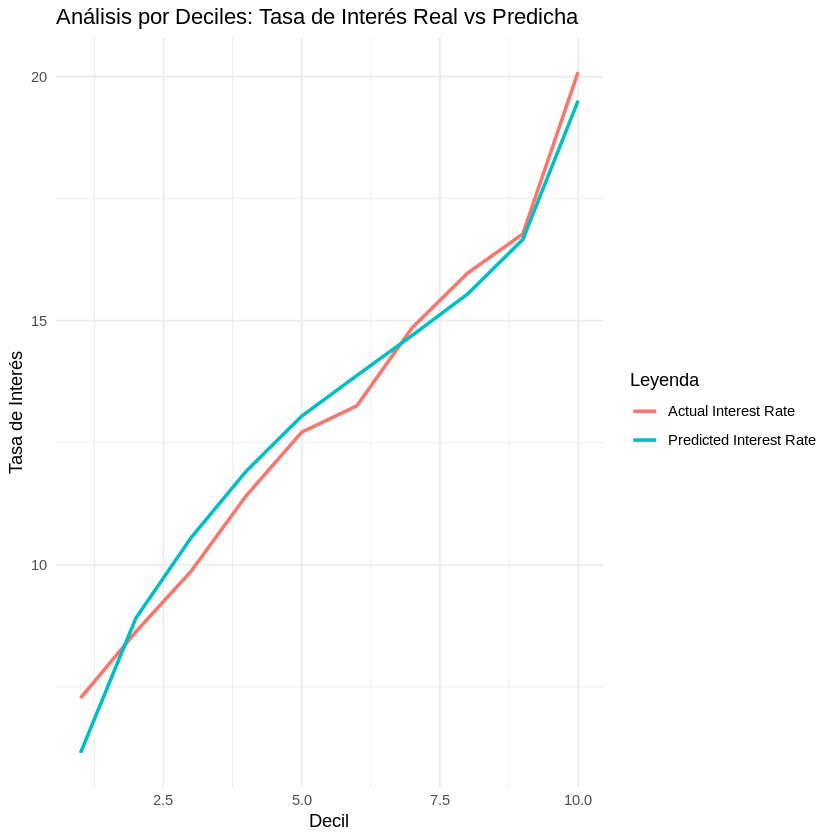

In [58]:
# Cargar librería
library(ggplot2)

# Crear el gráfico de líneas
ggplot(Decile_analysis_train, aes(x = Deciles)) +
  geom_line(aes(y = Interest_Rate, color = "Actual Interest Rate"), size = 1) +
  geom_line(aes(y = pred, color = "Predicted Interest Rate"), size = 1) +
  labs(title = "Análisis por Deciles: Tasa de Interés Real vs Predicha",
       x = "Decil",
       y = "Tasa de Interés",
       color = "Leyenda") +
  theme_minimal()


In [59]:
# Cargar librerías
library(dplyr)

# Crear los deciles con qcut en R
test$Deciles <- cut(test$pred,
                    breaks = quantile(test$pred, probs = seq(0, 1, by = 0.1), na.rm = TRUE),
                    labels = FALSE, include.lowest = TRUE)

# Calcular el promedio de Interest_Rate y pred por decil
Decile_analysis_test <- test %>%
  group_by(Deciles) %>%
  summarise(Interest_Rate = mean(Interest_Rate, na.rm = TRUE),
            pred = mean(pred, na.rm = TRUE)) %>%
  arrange(desc(Deciles))

# Mostrar resultado
print(Decile_analysis_test)


# A tibble: 10 × 3
   Deciles Interest_Rate  pred
     <int>         <dbl> <dbl>
 1      10         19.4  19.5 
 2       9         16.9  16.6 
 3       8         15.3  15.5 
 4       7         14.5  14.7 
 5       6         13.8  13.8 
 6       5         12.6  13.0 
 7       4         11.4  11.9 
 8       3          9.77 10.7 
 9       2          8.79  8.87
10       1          7.42  5.98


In [60]:
SSE <- sum((test$Interest_Rate - test$pred)^2)  # Suma de errores al cuadrado
SST <- sum((test$Interest_Rate - mean(test$Interest_Rate))^2)  # Suma total de cuadrados
R2_test <- 1 - (SSE / SST)
print(R2_test)


[1] 0.7730754


# REGULARIZACIÓN

In [61]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:

library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



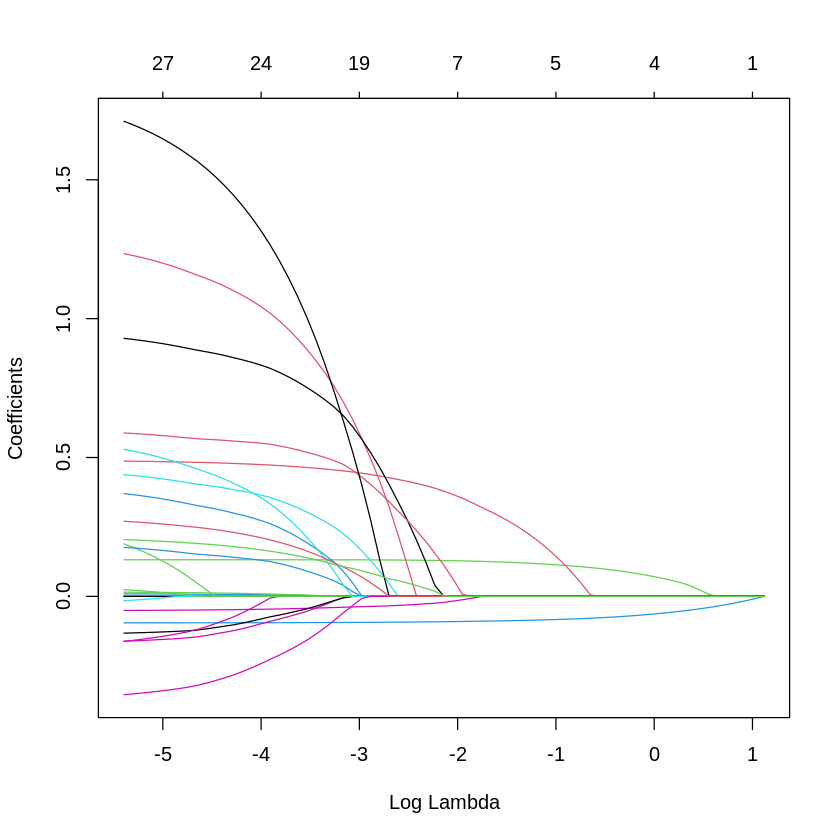

In [63]:
fitlasso<-glmnet(X_train,y_train,alpha = 1)
fitridge<-glmnet(X_train,y_train,alpha = 0)

#ver la variacion de los coeficientes con el lambda
plot(fitlasso, xvar="lambda")

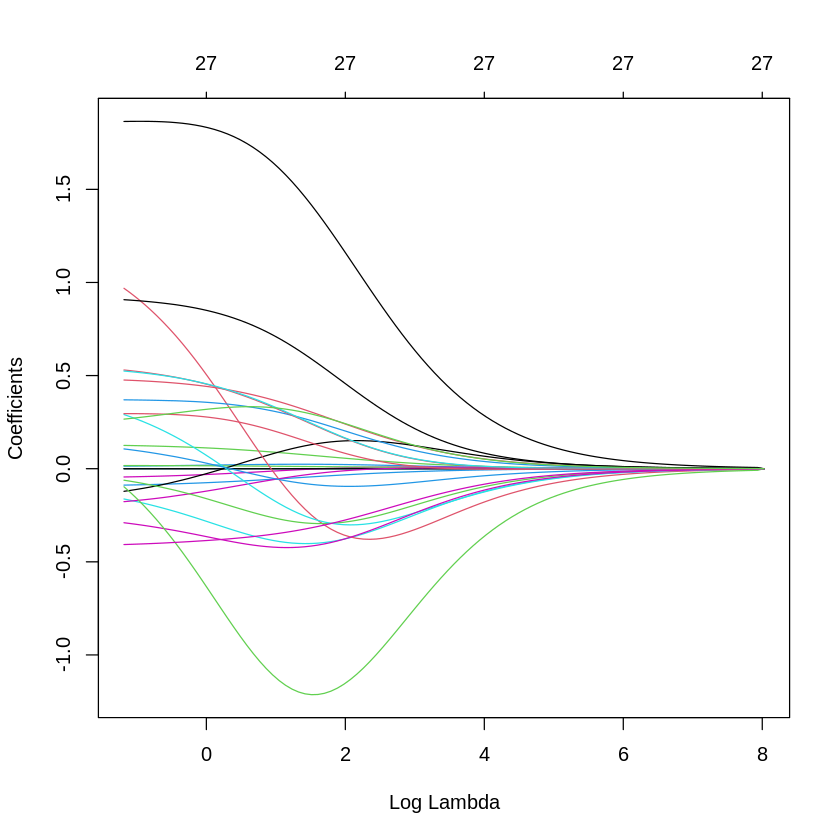

In [64]:
plot(fitridge, xvar="lambda")

In [65]:
X_train <- as.matrix(X_train)
X_test <- as.matrix(X_test)
y_train <- as.numeric(y_train)
y_test <- as.numeric(y_test)


In [66]:
foundridge<-cv.glmnet(X_train, y_train,alpha=0,nfolds=5)

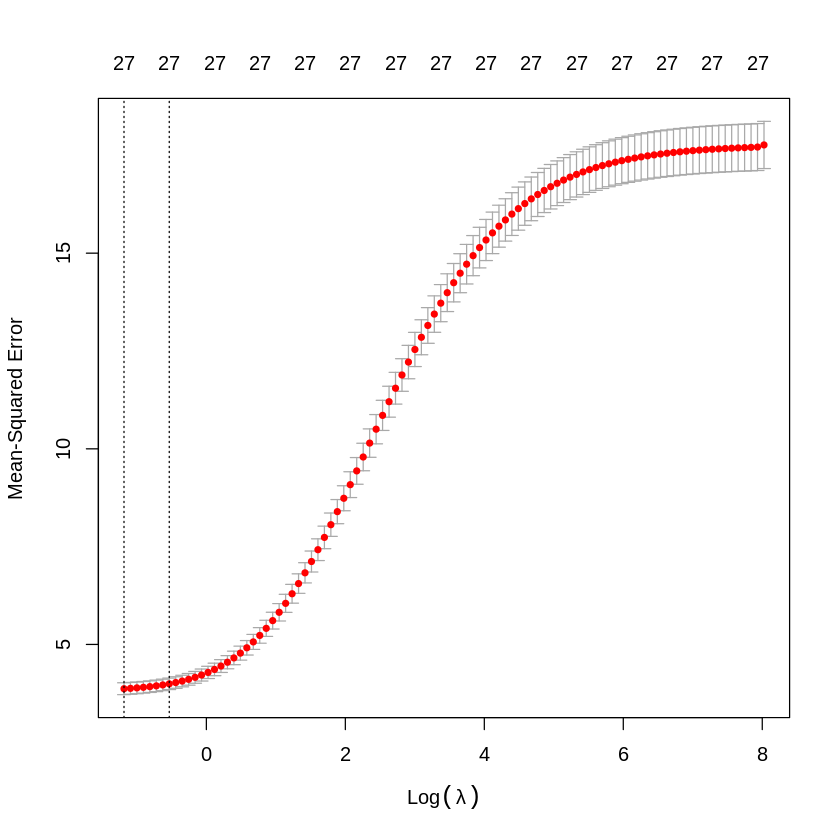

In [67]:
plot(foundridge)

In [68]:
#veo los lambda minimos
foundridge$lambda.1se

[1] 0.5862261

In [69]:
foundridge$lambda.min

[1] 0.3056588

In [70]:
coef(foundridge,s=foundridge$lambda.1se)

29 x 1 sparse Matrix of class "dgCMatrix"
                                          s1
(Intercept)                     6.411907e+01
Intercept                       .           
Amount_Requested                8.121949e-05
Amount_Funded_By_Investors      8.744097e-05
Loan_Length                     1.192882e-01
Debt_To_Income_Ratio            1.624597e-02
Monthly_Income                 -2.494172e-05
Open_CREDIT_Lines              -3.850773e-02
Revolving_CREDIT_Balance       -6.620544e-06
Inquiries_in_the_Last_6_Months  4.625045e-01
Employment_Length               1.640756e-02
Fico_Mean                      -8.237540e-02
Loan_Purposecar                -2.208995e-01
Loan_Purposecredit_card        -1.506222e-01
Loan_Purposedebt_consolidation -7.765810e-02
Loan_Purposeeducational         7.523901e-01
Loan_Purposehome_improvement   -1.086650e-01
Loan_Purposehouse               3.654236e-01
Loan_Purposemajor_purchase      1.881806e-01
Loan_Purposemedical            -3.265121e-01
Loan_Purposem

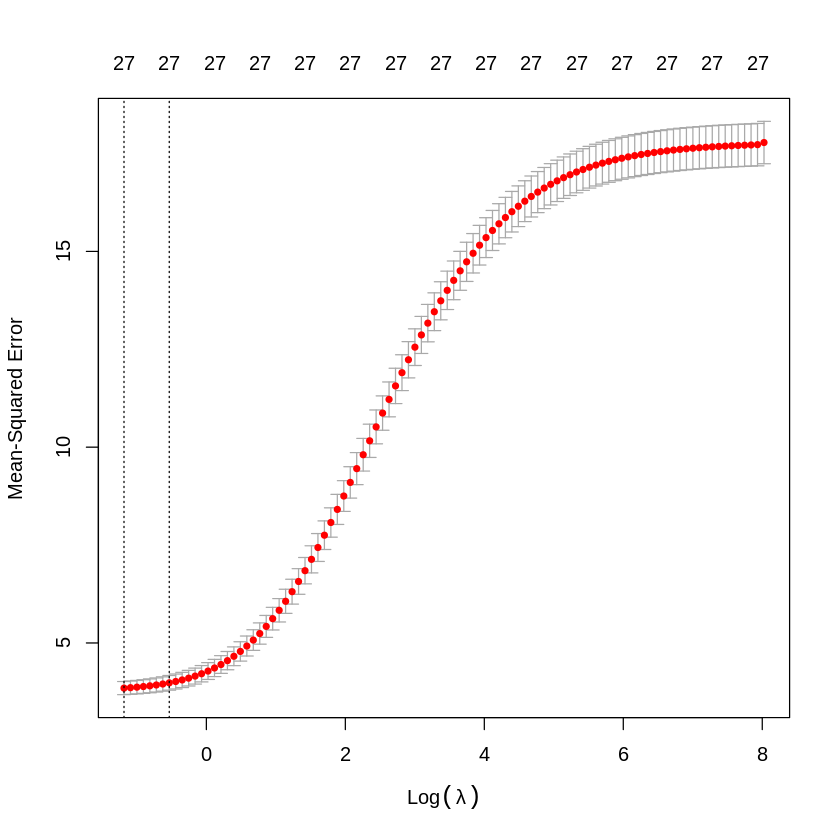

In [71]:
foundlasso<-cv.glmnet(X_train, y_train,alpha=0,nfolds=5)

#grafico lambda vs mse
plot(foundlasso)

In [72]:
#veo los lambda minimos
foundlasso$lambda.1se

[1] 0.5862261

In [73]:
foundlasso$lambda.min

[1] 0.3056588

In [74]:
coef(fitlasso,s=foundlasso$lambda.min)

29 x 1 sparse Matrix of class "dgCMatrix"
                                          s1
(Intercept)                     6.694210e+01
Intercept                       .           
Amount_Requested                4.798499e-05
Amount_Funded_By_Investors      7.197526e-05
Loan_Length                     1.176005e-01
Debt_To_Income_Ratio            .           
Monthly_Income                  .           
Open_CREDIT_Lines               .           
Revolving_CREDIT_Balance        .           
Inquiries_in_the_Last_6_Months  2.003209e-01
Employment_Length               .           
Fico_Mean                      -8.532500e-02
Loan_Purposecar                 .           
Loan_Purposecredit_card         .           
Loan_Purposedebt_consolidation  .           
Loan_Purposeeducational         .           
Loan_Purposehome_improvement    .           
Loan_Purposehouse               .           
Loan_Purposemajor_purchase      .           
Loan_Purposemedical             .           
Loan_Purposem

In [99]:
coef(fitlasso,s=foundlasso$lambda.1se)

29 x 1 sparse Matrix of class "dgCMatrix"
                                          s1
(Intercept)                     6.219846e+01
Intercept                       .           
Amount_Requested                4.117533e-05
Amount_Funded_By_Investors      4.628739e-05
Loan_Length                     9.948679e-02
Debt_To_Income_Ratio            .           
Monthly_Income                  .           
Open_CREDIT_Lines               .           
Revolving_CREDIT_Balance        .           
Inquiries_in_the_Last_6_Months  .           
Employment_Length               .           
Fico_Mean                      -7.677539e-02
Loan_Purposecar                 .           
Loan_Purposecredit_card         .           
Loan_Purposedebt_consolidation  .           
Loan_Purposeeducational         .           
Loan_Purposehome_improvement    .           
Loan_Purposehouse               .           
Loan_Purposemajor_purchase      .           
Loan_Purposemedical             .           
Loan_Purposem

In [75]:
# aqui hago redes elasticas de 0.1 a 0.9
for (i in 1:10){
  assign(paste("found", i, sep=""), cv.glmnet(X_train, y_train, nfolds=5,
                                              alpha=i/10,))}

In [76]:
min(foundridge$cvm)

[1] 3.868407

In [77]:
min(found1$cvm)

[1] 3.81727

In [78]:
min(found2$cvm)

[1] 3.76529

In [79]:
min(found3$cvm)

[1] 3.803179

In [80]:
min(found4$cvm)

[1] 3.806065

In [81]:
min(found5$cvm)

[1] 3.786587

In [82]:
min(found6$cvm)

[1] 3.811142

In [83]:
min(found7$cvm)

[1] 3.781258

In [84]:
min(found8$cvm)

[1] 3.811881

In [85]:
min(found9$cvm)

[1] 3.797923

In [90]:
elastic1<-glmnet(X_train,y_train,alpha = 0.1)
coef(elastic1,s=found2$lambda.1se)

29 x 1 sparse Matrix of class "dgCMatrix"
                                          s1
(Intercept)                     6.700309e+01
Intercept                       .           
Amount_Requested                7.619534e-05
Amount_Funded_By_Investors      8.739669e-05
Loan_Length                     1.236193e-01
Debt_To_Income_Ratio            6.488356e-03
Monthly_Income                 -1.533850e-05
Open_CREDIT_Lines              -3.331129e-02
Revolving_CREDIT_Balance       -4.799653e-06
Inquiries_in_the_Last_6_Months  4.425076e-01
Employment_Length               2.583996e-03
Fico_Mean                      -8.647097e-02
Loan_Purposecar                 .           
Loan_Purposecredit_card        -1.996339e-02
Loan_Purposedebt_consolidation  .           
Loan_Purposeeducational         4.953814e-01
Loan_Purposehome_improvement    .           
Loan_Purposehouse               1.291248e-01
Loan_Purposemajor_purchase      1.162737e-01
Loan_Purposemedical             .           
Loan_Purposem

In [95]:
# Convierte X_test a data.frame SOLO para stepwise (lm)
predicciones4 <- predict(best_model, as.data.frame(X_test))

# Usa X_test como matriz para glmnet (red elástica, ridge y lasso)
predicciones1 <- predict.glmnet(elastic1, X_test, s = elastic1$lambda.min)
predicciones2 <- predict.glmnet(fitridge, X_test, s = foundridge$lambda.min)
predicciones3 <- predict.glmnet(fitlasso, X_test, s = foundlasso$lambda.min)
predicciones5 <- predict.glmnet(fitridge, X_test, s = foundridge$lambda.1se)
predicciones6 <- predict.glmnet(fitlasso, X_test, s = foundlasso$lambda.1se)


In [96]:
#calcular el MSE
erroreselastic=sqrt(mean((predicciones1-X_test[,1])^2))
erroresridge=sqrt(mean((predicciones2-X_test[,1])^2))
erroreslasso=sqrt(mean((predicciones3-X_test[,1])^2))
erroresstep=sqrt(mean((predicciones4-X_test[,1])^2))
erroresridge1se=sqrt(mean((predicciones5-X_test[,1])^2))
erroreslasso1se=sqrt(mean((predicciones6-X_test[,1])^2))


In [98]:
cat("\n Errores de los Modelos \n")
cat("----------------------------------\n")
cat(" Elastic Net:", erroreselastic, "\n")
cat(" Ridge:", erroresridge, "\n")
cat(" Lasso:", erroreslasso, "\n")
cat(" Stepwise:", erroresstep, "\n")
cat(" Ridge (1-SE):", erroresridge1se, "\n")
cat(" Lasso (1-SE):", erroreslasso1se, "\n")
cat("----------------------------------\n")



 Errores de los Modelos 
----------------------------------
 Elastic Net: 12.39012 
 Ridge: 12.57232 
 Lasso: 12.45678 
 Stepwise: 12.62351 
 Ridge (1-SE): 12.5282 
 Lasso (1-SE): 12.34931 
----------------------------------



Los 6 modelos de regresion de: stepwise,lasso,rigde y elastic, lasso con 1se y rigde con 1se, tuvieron un mse que se diferencia por decimas.

El mejor modelo que tiene menor MSE es el modelo de regresión lineal Lasso con 1SE CON 12.34931 con un lambda de 0.586

El segundo mejor modelo es Elastic Net con MSE = 12.39012, con un alpha de = 0.8, que obtuve el menor error de validación cruzada con 3.765289

Modelo del mejor modelo de regresión Lasso con 1se

In [103]:
# 1️ Obtener coeficientes del modelo Lasso en lambda.1se
coef_lasso <- coef(fitlasso, s = foundlasso$lambda.1se)

# 2️Extraer nombres de las variables seleccionadas (excluyendo el intercepto)
vars_seleccionadas <- rownames(coef_lasso)[coef_lasso[, 1] != 0]
vars_seleccionadas <- vars_seleccionadas[vars_seleccionadas != "(Intercept)"]  # Remover el intercepto

# 3️ Filtrar X_train y X_test con las variables seleccionadas
X_train_lasso <- X_train[, vars_seleccionadas, drop = FALSE]  # drop = FALSE para mantener el formato de data.frame
X_test_lasso <- X_test[, vars_seleccionadas, drop = FALSE]

# 4️ Ajustar el modelo de regresión lineal con las variables seleccionadas
modelo_lm <- lm(y_train ~ ., data = as.data.frame(cbind(y_train, X_train_lasso)))  # Unimos y_train con X_train_lasso

# 5️ Hacer predicciones en el conjunto de prueba
y_pred <- predict(modelo_lm, newdata = as.data.frame(X_test_lasso))

# 6️ Evaluar el modelo (por ejemplo, con RMSE)
rmse <- sqrt(mean((y_test - y_pred)^2))
print(paste("RMSE del modelo final:", round(rmse, 4)))

# 7️ Resumen del modelo
summary(modelo_lm)


[1] "RMSE del modelo final: 2.0193"



Call:
lm(formula = y_train ~ ., data = as.data.frame(cbind(y_train, 
    X_train_lasso)))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0498 -1.3728 -0.1332  1.2238  8.5121 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 7.308e+01  1.136e+00  64.335  < 2e-16 ***
Amount_Requested            7.713e-05  2.652e-05   2.908  0.00369 ** 
Amount_Funded_By_Investors  7.608e-05  2.658e-05   2.862  0.00426 ** 
Loan_Length                 1.399e-01  5.719e-03  24.462  < 2e-16 ***
Fico_Mean                  -9.565e-02  1.579e-03 -60.575  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.021 on 1526 degrees of freedom
Multiple R-squared:  0.7706,	Adjusted R-squared:   0.77 
F-statistic:  1281 on 4 and 1526 DF,  p-value: < 2.2e-16


In [104]:
# 1️ Obtener coeficientes del modelo Elastic Net en lambda.1se
coef_elastic <- coef(elastic1, s = found2$lambda.1se)

# 2️ Extraer nombres de las variables seleccionadas (excluyendo el intercepto)
vars_seleccionadas_elastic <- rownames(coef_elastic)[coef_elastic[, 1] != 0]
vars_seleccionadas_elastic <- vars_seleccionadas_elastic[vars_seleccionadas_elastic != "(Intercept)"]

# 3️ Filtrar X_train y X_test con las variables seleccionadas
X_train_elastic <- X_train[, vars_seleccionadas_elastic, drop = FALSE]
X_test_elastic <- X_test[, vars_seleccionadas_elastic, drop = FALSE]

# 4️ Ajustar el modelo de regresión lineal con las variables seleccionadas
modelo_elastic_lm <- lm(y_train ~ ., data = as.data.frame(cbind(y_train, X_train_elastic)))

# 5️ Hacer predicciones en el conjunto de prueba
y_pred_elastic <- predict(modelo_elastic_lm, newdata = as.data.frame(X_test_elastic))

# 6️ Evaluar el modelo con RMSE
rmse_elastic <- sqrt(mean((y_test - y_pred_elastic)^2))
print(paste("RMSE del modelo con Elastic Net:", round(rmse_elastic, 4)))

# 7️ Resumen del modelo
summary(modelo_elastic_lm)


[1] "RMSE del modelo con Elastic Net: 1.9366"



Call:
lm(formula = y_train ~ ., data = as.data.frame(cbind(y_train, 
    X_train_elastic)))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5201 -1.2447 -0.1802  1.1222  8.8706 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.276e+01  1.213e+00  59.960  < 2e-16 ***
Amount_Requested                8.233e-05  2.626e-05   3.135 0.001751 ** 
Amount_Funded_By_Investors      1.035e-04  2.574e-05   4.022 6.05e-05 ***
Loan_Length                     1.322e-01  5.567e-03  23.740  < 2e-16 ***
Debt_To_Income_Ratio            9.913e-03  8.447e-03   1.174 0.240742    
Monthly_Income                 -2.834e-05  2.459e-05  -1.152 0.249351    
Open_CREDIT_Lines              -5.262e-02  1.464e-02  -3.594 0.000336 ***
Revolving_CREDIT_Balance       -1.240e-05  5.929e-06  -2.092 0.036589 *  
Inquiries_in_the_Last_6_Months  4.925e-01  5.004e-02   9.841  < 2e-16 ***
Employment_Length               1.701e-02  1.523e-02   1.1

ANALISIS: Comparando los dos modelos con el RMSE: Ahora el mejor modelo es la red-Elastica con RMSE =1.9366, Con Multiple R-squared:  0.7938,	Adjusted R-squared:  0.7908, mientras que con el modelo de regresion de lasso-1se su RMSE es = 2.019 con Multiple R-squared:  0.7706,	Adjusted R-squared:   0.77

Por lo tanto las variables explicativas de los 2 modelos explican muy bien la variable dependiente. En el caso que uno necesite la mejor explicación del modelo la mejor elección seria La red-elastica, pero  si uno quiere un modelo mas sencillo, con menos varibales, sin perder casi nada de explicación del modelo entonces la mejor obción es Lasso-1se

RESUMEN GENERADO POR IA:

✍️ Revisión y Sugerencias
Aquí tienes una versión mejor estructurada y más precisa del análisis:

Análisis del Desempeño de los Modelos:
Al comparar los dos modelos mediante RMSE, R² y R² ajustado, encontramos lo siguiente:

📌 Elastic Net:

RMSE = 1.9366

𝑅2R2= 0.7938

𝑅2R2ajustado = 0.7908

📌 Lasso (1-SE):

RMSE = 2.019

𝑅2R2= 0.7706

𝑅2R2ajustado = 0.77

Ambos modelos explican bien la variable dependiente, con valores de
𝑅2R2 cercanos a 0.80. Sin embargo, Elastic Net ofrece un mejor ajuste, con un menor error cuadrático medio (RMSE más bajo) y una mayor capacidad explicativa (
𝑅2R2 superior).

Conclusión:

Si se busca el mejor ajuste y menor error de predicción, Elastic Net es la mejor opción.

Si se prefiere un modelo más simple, con menos variables, sin perder demasiada capacidad predictiva, Lasso (1-SE) es una buena alternativa.

🔹 Recomendación: Si la interpretabilidad es clave y se busca reducir la cantidad de variables, Lasso (1-SE) es preferible. Pero si el objetivo es maximizar la precisión del modelo, Elastic Net es la mejor elección